In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
%run '/content/drive/MyDrive/Colab Notebooks/setup.ipynb'

# The dataset used here can be found in https://www.kaggle.com/pravdomirdobrev/texas-wind-turbine-dataset-simulated

In [ ]:
upload_files()

Saving TexasTurbine.csv to TexasTurbine.csv


{'TexasTurbine.csv': b'Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | (\'C)\r\n"Jan 1, 12:00 am",1766.64,9.926,128,1.00048,18.263\r\n"Jan 1, 01:00 am",1433.83,9.273,135,0.99979,18.363\r\n"Jan 1, 02:00 am",1167.23,8.66,142,0.999592,18.663\r\n"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763\r\n"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963\r\n"Jan 1, 05:00 am",1293.93,8.996,149,0.998507,19.063\r\n"Jan 1, 06:00 am",1301.63,9.016,151,0.998211,19.113\r\n"Jan 1, 07:00 am",1308.13,9.036,154,0.997815,19.163\r\n"Jan 1, 08:00 am",792.081,7.612,154,1.00028,19.363\r\n"Jan 1, 09:00 am",399.537,6.129,162,1.00295,19.963\r\n"Jan 1, 10:00 am",362.988,5.961,152,1.00048,20.763\r\n"Jan 1, 11:00 am",951.359,8.117,141,1.00068,21.063\r\n"Jan 1, 12:00 pm",1549.75,9.54,141,0.996926,21.063\r\n"Jan 1, 01:00 pm",1835.22,10.094,136,1.00028,20.763\r\n"Jan 1, 02:00 pm",1208.37,8.789,137,0.998801,20.663\r\n"Jan 1, 03:00 pm",686.154,7.286,1

In [ ]:
original = pd.read_csv("/content/TexasTurbine.csv")

In [ ]:
df = original.copy()

In [ ]:
COL_DICTIONARY = {
    "Time stamp": "time",
    "System power generated | (kW)": "power",
    "Wind speed | (m/s)": "wind_speed",
    "Wind direction | (deg)": "wind_direction",
    "Pressure | (atm)": "pressure",
    "Air temperature | ('C)": "temp",
}

In [ ]:
def create_moving_average(data, average=7, min_periods=1):
  return data.rolling(average, min_periods=min_periods).mean()

import datetime as dt
import matplotlib.dates as mdates

def plot_trend(data, y, x=None, ax=None, date_index=True, moving_average=None, 
               min_periods=1, label=None, month_interval=6):
  if date_index:
    x = data['date'].map(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))

  if label is None:
    label = y

  if moving_average is not None:
    data = create_moving_average(data[[y]], average=moving_average, min_periods=min_periods)
  
  if ax is None:
    ax = sns.lineplot(data=data, x=x, y=y, label=label)

    if date_index:
      ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
      ax.xaxis.set_major_locator(mdates.MonthLocator(interval=month_interval))

  else:
    ax = sns.lineplot(data=data, x=x, y=y, ax=ax, label=label)

  return ax

In [ ]:
df = df.rename(columns=COL_DICTIONARY)
df

,time,power,wind_speed,wind_direction,pressure,temp
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963
...,...,...,...,...,...,...
8755,"Dec 31, 07:00 pm",1234.70,8.848,129,0.998604,19.663
8756,"Dec 31, 08:00 pm",1105.37,8.502,118,1.000090,19.063
8757,"Dec 31, 09:00 pm",1405.71,9.224,117,0.998408,18.463
8758,"Dec 31, 10:00 pm",1221.36,8.799,116,0.998013,18.063


In [ ]:
date_format = "%b %d, %I:%S %p"

df['time'] = pd.to_datetime(df['time'], format=date_format)

In [ ]:
df = df.set_index('time')

In [ ]:
daily_df = df.resample("1D").mean()

,power,wind_speed,wind_direction,pressure,temp
time,,,,,
1900-01-01,1163.519167,8.523375,141.125000,0.998999,19.894250
1900-01-02,1193.240042,8.400458,156.416667,0.996132,20.413000
1900-01-03,2251.210417,11.291250,154.958333,0.991826,20.558833
1900-01-04,1749.872267,9.905917,157.416667,0.988896,21.081750
1900-01-05,1858.624208,9.906000,21.750000,0.998112,13.271333
...,...,...,...,...,...
1900-12-27,1763.144750,9.474250,301.833333,1.000534,9.388000
1900-12-28,1741.895333,9.608000,278.916667,0.995996,11.425500
1900-12-29,656.364833,6.926917,275.666667,0.998669,11.515083


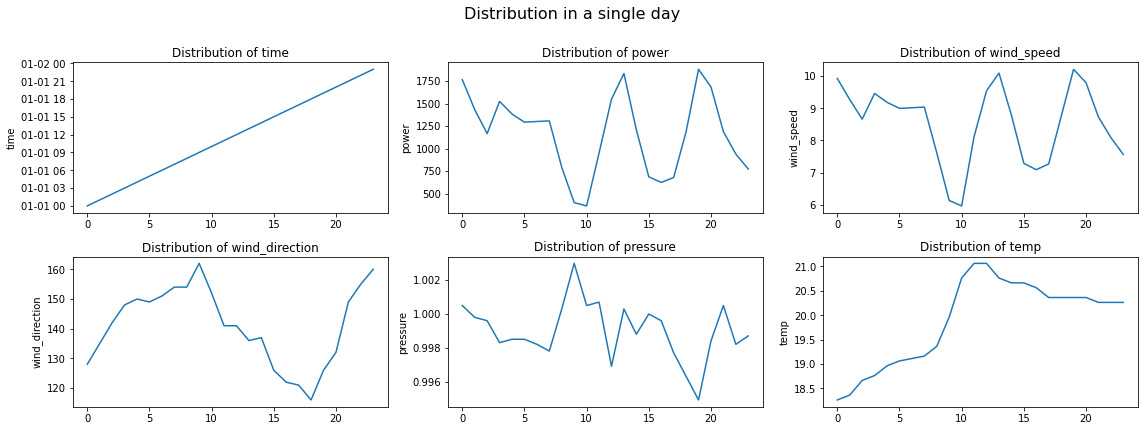

In [ ]:
one_day = df.loc['1900-01-01']
one_day.reset_index(inplace=True)
plot_each_col(data=one_day, col_list=one_day.columns, n_col=3, plot_type="line", figsize=(16, 8), title="Distribution in a single day")

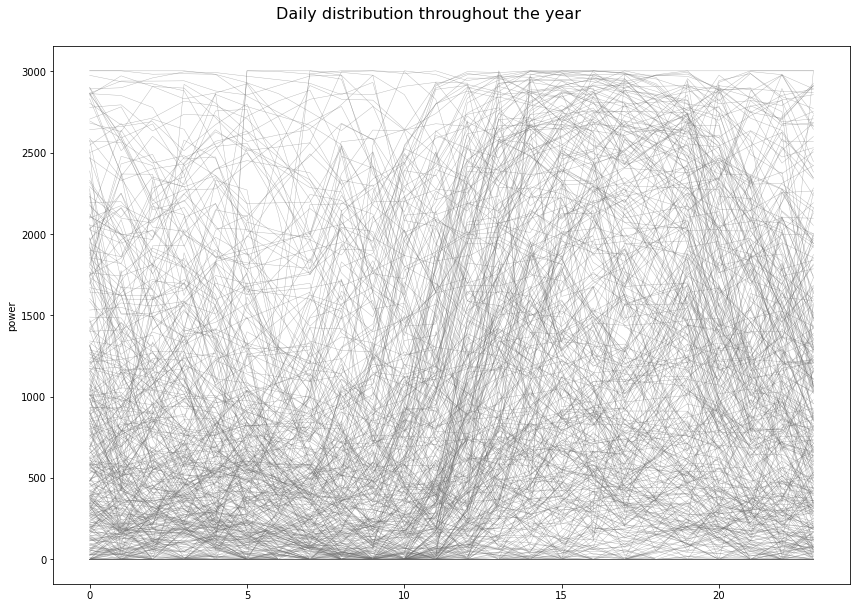

In [ ]:
@plotter
def plot_daily_year(data, date_range, col):
  ax = plt.gca()
  for i in date_range:
    daily_df = data.loc[str(i)].reset_index()
    sns.lineplot(data=daily_df, x=daily_df.index, y='power', ax=ax, color='.4', lw=0.4, alpha=0.5)

date_range = pd.period_range("1900-01-01", "1900-12-31", freq='1D')
plot_daily_year(data=df, date_range=date_range, col='wind_speed', figsize=(12, 8), title="Daily distribution throughout the year, for wind_speed")

In [ ]:
df_by_time = df.groupby(lambda date: date.time)
df_by_time_mean = df_by_time.mean().reset_index(drop=True)
df_time = df.reset_index()
df_time['time'] = df_time['time'].apply(lambda x: str(x.time()))

In [ ]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            8760 non-null   object 
 1   power           8760 non-null   float64
 2   wind_speed      8760 non-null   float64
 3   wind_direction  8760 non-null   int64  
 4   pressure        8760 non-null   float64
 5   temp            8760 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


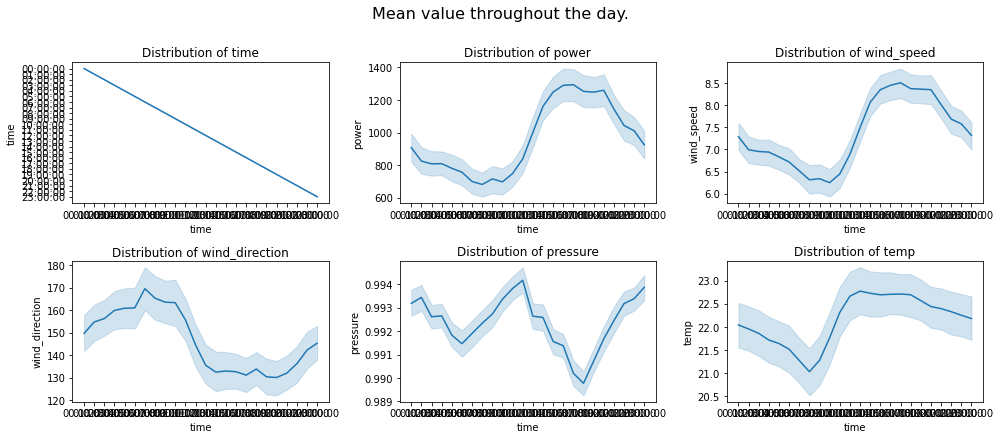

In [ ]:
plot_each_col(data=df_time, col_list=df_time.columns, n_col=3, plot_type='line', x='time', figsize=(14, 8), title="Mean value throughout the day.", ci=95)

Text(0.5, 1.0, 'Correlations between columns')

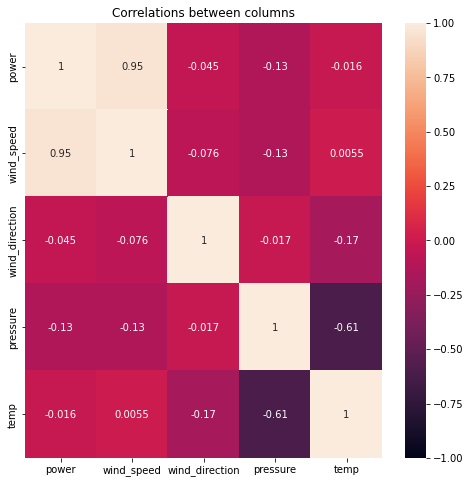

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(8, 8))
ax = sns.heatmap(data=df_corr, vmax=1, vmin=-1, annot=True)
ax.set_title("Correlations between columns")

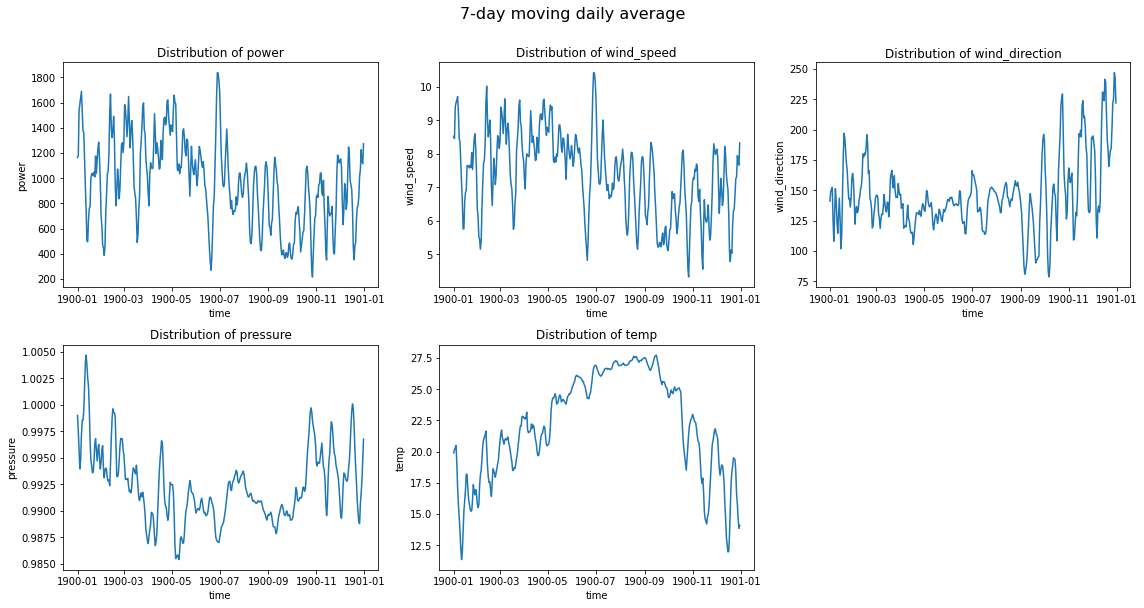

In [ ]:
daily_df_2 = daily_df.rolling(7, min_periods=1).mean()
plt.figure(figsize=(12, 8))
plot_each_col(data=daily_df_2, col_list=daily_df_2.columns, n_col=3, plot_type='line', title="7-day moving daily average", figsize=(16, 8))